In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
import warnings
warnings.filterwarnings('ignore')


In [48]:
df = pd.read_csv('com.csv', delimiter=',', error_bad_lines=False)


b'Skipping line 14106: expected 8 fields, saw 9\nSkipping line 39685: expected 8 fields, saw 14\nSkipping line 44664: expected 8 fields, saw 10\nSkipping line 53147: expected 8 fields, saw 9\n'
b'Skipping line 119759: expected 8 fields, saw 14\nSkipping line 124900: expected 8 fields, saw 10\nSkipping line 128488: expected 8 fields, saw 13\n'
b'Skipping line 131752: expected 8 fields, saw 11\n'


In [49]:
df.shape

(159579, 8)

In [50]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [51]:
df.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159579 entries, 0 to 159578
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                159579 non-null  object 
 1   comment_text      159572 non-null  object 
 2   malignant         159566 non-null  object 
 3   highly_malignant  159564 non-null  float64
 4   rude              159564 non-null  float64
 5   threat            159564 non-null  float64
 6   abuse             159564 non-null  float64
 7   loathe            159561 non-null  float64
dtypes: float64(5), object(3)
memory usage: 9.7+ MB


In [53]:
df.isnull().sum()

id                   0
comment_text         7
malignant           13
highly_malignant    15
rude                15
threat              15
abuse               15
loathe              18
dtype: int64

In [54]:
df['comment_text']=df['comment_text'].fillna((df['comment_text'].mode()))

In [55]:
df['malignant']=df['malignant'].fillna((df['malignant'].mode()))

In [56]:
df['highly_malignant']=df['highly_malignant'].fillna((df['highly_malignant'].mode()))

In [57]:
df['rude']=df['rude'].fillna((df['rude'].mode()))

In [58]:
df['threat']=df['threat'].fillna((df['threat'].mode()))

In [59]:
df['abuse']=df['abuse'].fillna((df['abuse'].mode()))

In [60]:
df['loathe']=df['loathe'].fillna((df['loathe'].mode()))

In [61]:
df.isnull().sum()

id                   0
comment_text         7
malignant           13
highly_malignant    15
rude                15
threat              15
abuse               15
loathe              18
dtype: int64

In [62]:
df.corr()

,highly_malignant,rude,threat,abuse,loathe
highly_malignant,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.403014,1.000000,0.141179,0.741272,0.286866
threat,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.201600,0.286866,0.115128,0.337736,1.000000


<AxesSubplot:>

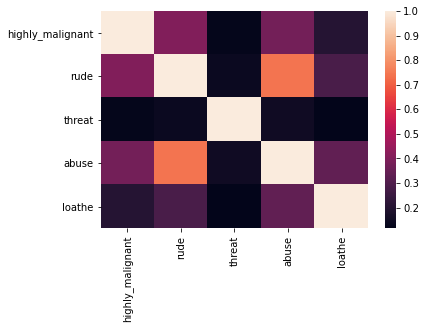

In [63]:
sns.heatmap(df.corr())

In [64]:
df.skew()

highly_malignant     9.851500
rude                 3.992713
threat              18.188599
abuse                4.160433
loathe              10.515584
dtype: float64

In [65]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [66]:
col=['malignant','highly_malignant','rude','loathe','abuse','threat']

malignant
0.0                                                                                                                                                                                                                                                                                                                                                                                        84980
0                                                                                                                                                                                                                                                                                                                                                                                          59290
1.0                                                                                                                                                                                                                         

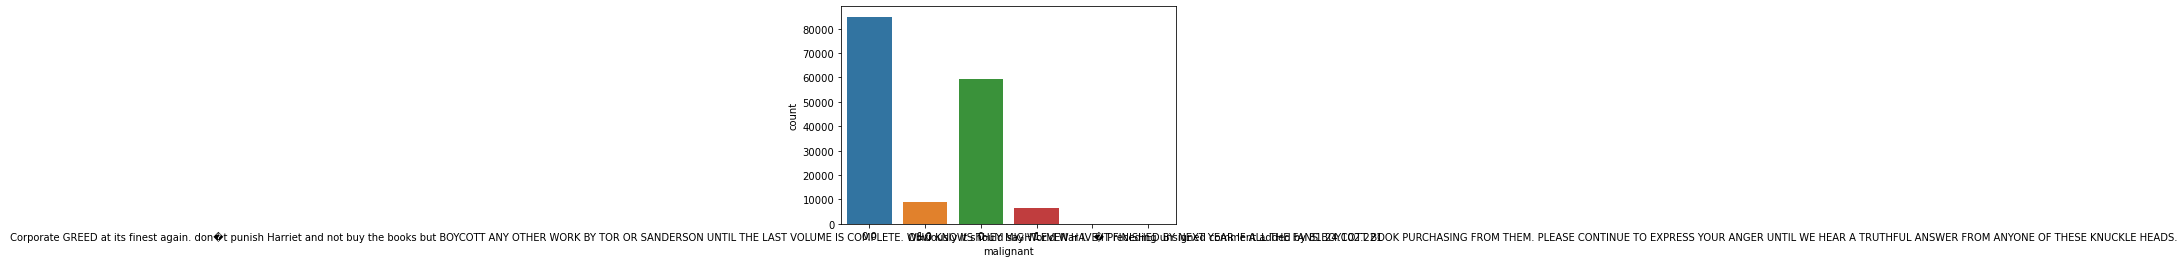

highly_malignant
0.0    157969
1.0      1595
Name: highly_malignant, dtype: int64


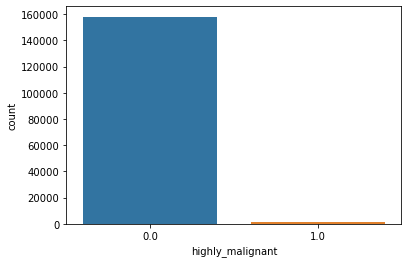

rude
0.0    151115
1.0      8449
Name: rude, dtype: int64


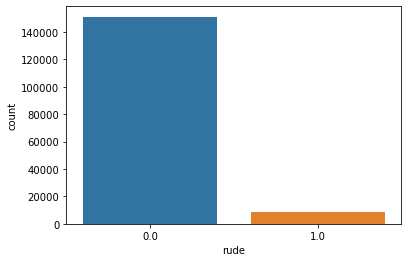

loathe
0.0    158156
1.0      1405
Name: loathe, dtype: int64


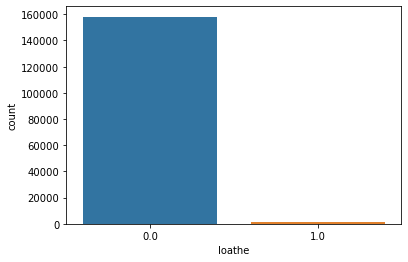

abuse
0.0    151687
1.0      7877
Name: abuse, dtype: int64


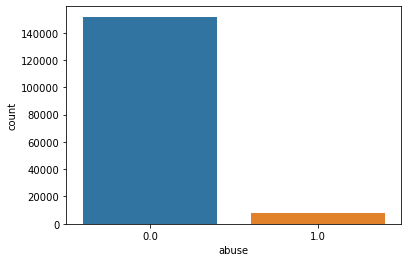

threat
0.0    159086
1.0       478
Name: threat, dtype: int64


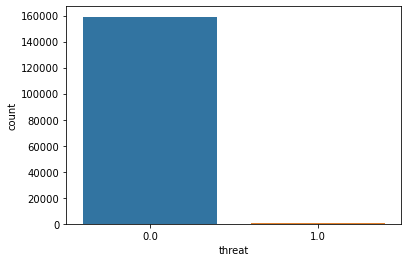

In [67]:
for i in col:
    print(i)
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [68]:
# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')
# Remove punctuation
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [69]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren t vandalisms just closure on some GAs after I voted at New York Dolls FAC And please don t remove the template from the talk page since I m retired now numbr numbr,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D aww He matches this background colour I m seemingly stuck with Thanks talk numbr numbr January numbr numbr UTC,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,Hey man I m really not trying to edit war It s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info,0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,More I can t make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up It s listed in the relevant form eg Wikipedia Good_article_nominations Transport,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,You sir are my hero Any chance you remember what page that s on,0.0,0.0,0.0,0.0,0.0,0.0
5,00025465d4725e87,Congratulations from me as well use the tools well talk,0.0,0.0,0.0,0.0,0.0,0.0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1.0,1.0,1.0,0.0,1.0,0.0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article has been reverted Please don t do it again or you will be banned,0.0,0.0,0.0,0.0,0.0,0.0
8,00037261f536c51d,Sorry if the word nonsense was offensive to you Anyway I m not intending to write anything in the article wow they would jump on me for vandalism I m merely requesting that it be more encyclopedic so one can use it for school as a reference I have been to the selective breeding page but it s almost a stub It points to animal breeding which is a short messy article that gives you no info There must be someone around with expertise in eugenics numbr numbr,0.0,0.0,0.0,0.0,0.0,0.0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from wordcloud import WordCloud


In [71]:
#hams=df['comment_text'][df['malignant']==1]

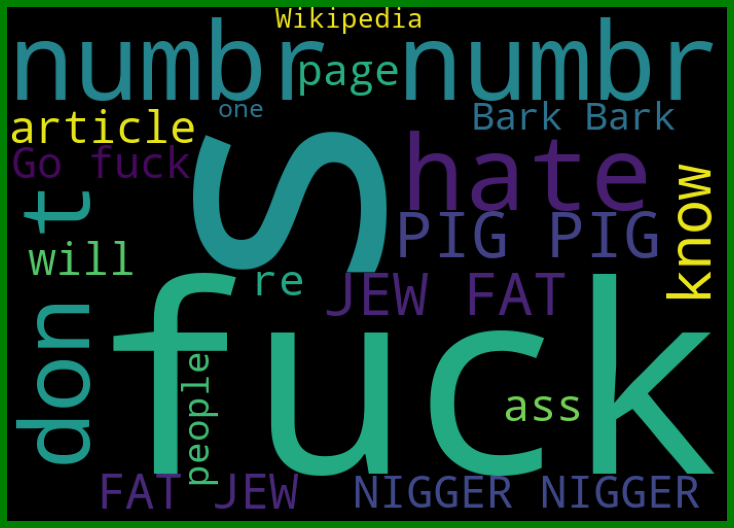

In [72]:
spams = df['comment_text'][df['malignant']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [73]:
import string
import nltk
from nltk.corpus import  stopwords

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [75]:

tf_vec = TfidfVectorizer()
naive = MultinomialNB()


In [76]:
df.dtypes

id                   object
comment_text         object
malignant            object
highly_malignant    float64
rude                float64
threat              float64
abuse               float64
loathe              float64
dtype: object

In [77]:
features = tf_vec.fit_transform(df['comment_text'].values.astype('str'))  



In [78]:
x=features
y=df['comment_text']

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)


In [80]:
df.isnull().sum()

id                   0
comment_text         7
malignant           13
highly_malignant    15
rude                15
threat              15
abuse               15
loathe              18
dtype: int64

Getting error bove now treating with the nan values 

In [81]:
df.dropna(subset = ['comment_text'], inplace=True)

In [82]:
df.dropna(subset = ['malignant'], inplace=True)

In [83]:
df.dropna(subset = ['rude'], inplace=True)

In [84]:
df.dropna(subset = ['threat'], inplace=True)

In [85]:
df.dropna(subset = ['abuse'], inplace=True)

In [86]:
df.dropna(subset = ['loathe'], inplace=True)

In [87]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [88]:
naive.fit(x_train,y_train)


ValueError: Input contains NaN

In [89]:
x.fillna(method = 'ffill', inplace = True)
y.fillna(method = 'ffill', inplace = True)

AttributeError: fillna not found